Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./1/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.5955, 'AUC-ROC': 0.6321205, 'Precision': 0.5701689933872153, 'Recall': 0.776, 'F1-score': 0.6573485811096993}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./1/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.6265, 'AUC-ROC': 0.6747034999999999, 'Precision': 0.6313603322949117, 'Recall': 0.608, 'F1-score': 0.6194600101884871}
Trying CatBoostClassifier - <catboost.core.CatBoostClassifier object at 0x000001FA714F3B80>
Got the result from ./1/predictions/CatBoostClassifier.npy
{'classifier': 'CatBoost', 'Accuracy': 0.6465, 'AUC-ROC': 0.7199359999999999, 'Precision': 0.6437684003925417, 'Recall': 0.656, 'F1-score': 0.6498266468548787}
Trying NNClassifier_features - <cvtda.classification.NNClassifier.NNCla

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score
0,Метод k ближайших соседей,0.5955,0.632120,0.570169,0.776,0.657349
1,Случайный лес,0.6265,0.674703,0.631360,0.608,0.619460
2,CatBoost,0.6465,0.719936,0.643768,0.656,0.649827
3,Нейронная сеть для тополог. признаков,0.6325,0.672362,0.628766,0.647,0.637753
4,ResNet50 – базовая модель,0.6240,0.667135,0.627310,0.611,0.619048
5,Комбинированная нейронная сеть,0.5785,0.611339,0.582027,0.557,0.569239


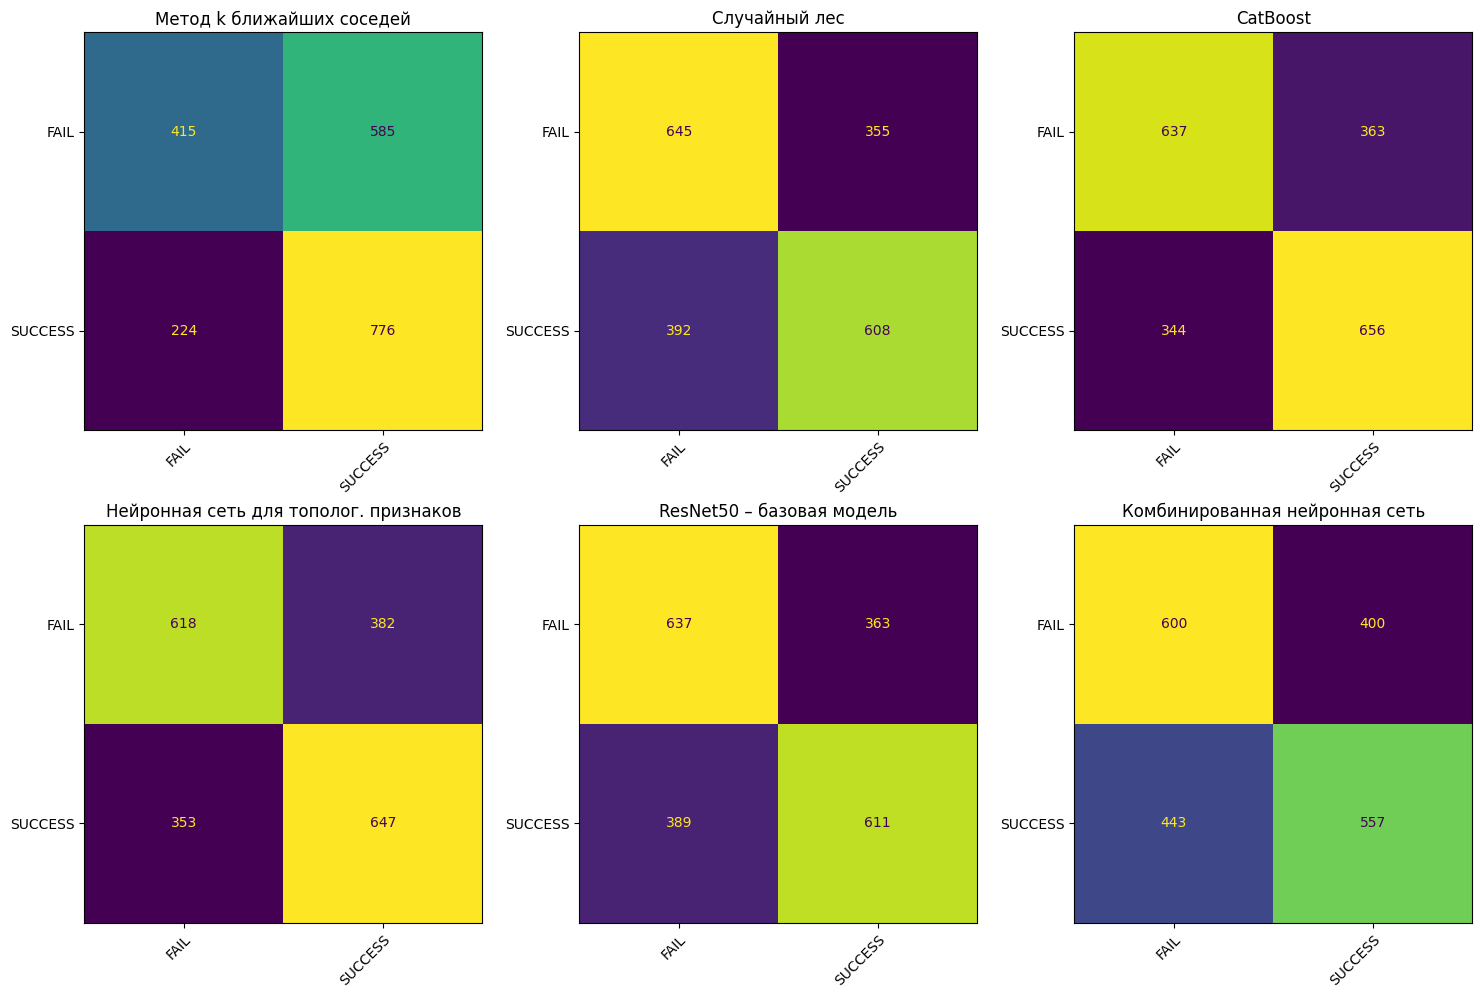

In [ ]:
import numpy
import cvtda.classification

test_labels = numpy.load("1/front/test_labels.npy")

CLASSES = [ 'FAIL', 'SUCCESS' ]

cvtda.classification.classify(
    None, None, None, None,
    None, None, test_labels, None,
    dump_name = "1/predictions",
    catboost_device = 'CPU', xgboost_device = 'cpu',
    only_get_from_dump = True, label_names = CLASSES
)


In [17]:
front = numpy.load("1_imgs/front/test_images.npy")
side = numpy.load("1_imgs/side/test_images.npy")
label = numpy.load("1_imgs/label/test_images.npy")

In [18]:
predictions = numpy.argmax(numpy.load("1/predictions/CatBoostClassifier.npy"), axis = 1)
imgs1 = numpy.where((predictions != test_labels) & numpy.isin(test_labels, 0))[0]
imgs2 = numpy.where((predictions != test_labels) & numpy.isin(test_labels, 1))[0]
imgs3 = numpy.where((predictions == test_labels) & numpy.isin(test_labels, 0))[0]
imgs4 = numpy.where((predictions == test_labels) & numpy.isin(test_labels, 1))[0]
print(imgs1, imgs2)
len(imgs1), len(imgs2), len(imgs3), len(imgs4)

[  2   7   9  15  17  20  22  33  43  49  55  58  59  60  61  62  63  66
  67  70  74  81  85  89  92  93  95  99 104 107 108 112 113 117 119 120
 122 127 129 134 136 137 138 140 146 148 150 154 168 172 177 181 185 189
 203 205 206 210 211 212 217 224 225 226 229 231 232 237 239 241 245 252
 253 254 258 259 262 263 264 265 266 271 273 276 278 283 287 291 308 312
 313 314 319 320 324 325 326 330 333 336 337 339 341 345 346 353 355 359
 360 361 362 365 367 368 370 373 374 375 376 380 394 396 400 406 411 413
 416 420 424 428 430 431 433 435 444 452 453 458 459 461 462 471 473 478
 481 483 485 486 492 498 501 502 504 508 510 512 513 517 519 526 528 533
 535 538 539 540 541 543 546 548 549 552 553 555 560 562 564 571 572 573
 574 575 576 593 594 596 597 599 601 603 605 606 613 617 619 620 623 624
 626 630 631 637 638 641 642 646 648 649 650 656 657 660 661 664 666 667
 674 676 682 683 690 693 694 696 698 700 701 704 705 706 709 720 725 729
 732 733 735 736 738 742 743 745 746 747 748 749 75

(363, 344, 637, 656)

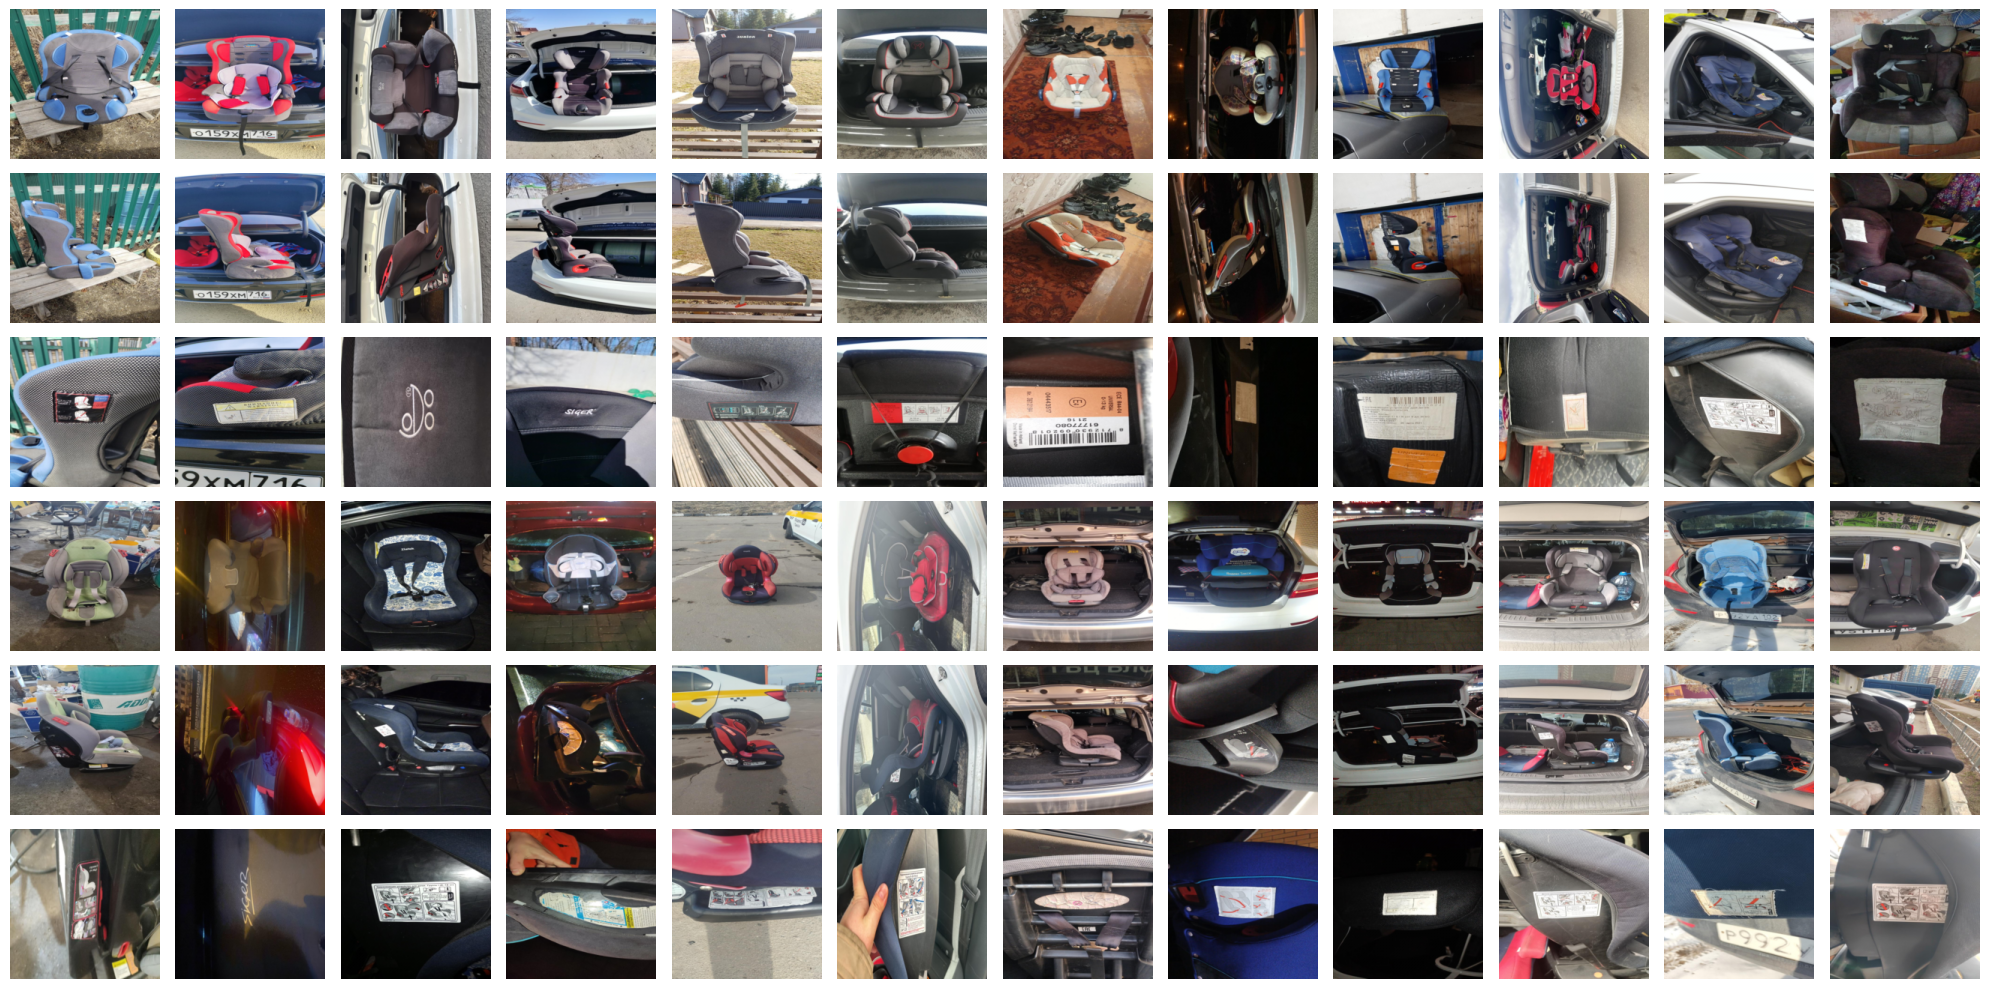

In [19]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(6, 12, figsize = (20, 10))

numpy.random.seed(42)

def draw(imgs, i0, j0):
    part = numpy.random.choice(imgs, size = 6)
    for j in range(6):
        axes[i0][j0 + j].imshow(front[part[j]])
        axes[i0][j0 + j].axis(False)
        
        axes[i0 + 1][j0 + j].imshow(side[part[j]])
        axes[i0 + 1][j0 + j].axis(False)
        
        axes[i0 + 2][j0 + j].imshow(label[part[j]])
        axes[i0 + 2][j0 + j].axis(False)

draw(imgs4, 0, 0)
draw(imgs2, 0, 6)
draw(imgs3, 3, 0)
draw(imgs1, 3, 6)

figure.tight_layout()

plt.savefig("1/predictions/error_examples.svg")
plt.savefig("1/predictions/error_examples.png")